In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#Table of Contents
##1) Business Objective
##2) Data understanding and EDA
   - Missing value treatment
   - Drop unncesssary and redundnat column
   - Drop duplicate data
   - identify target variable
   - EDA and outlier treatment
   - create derieved columns

##3) Data preparation
   - create dummy variables for categorical variables
   - split into traina and test sets
   - scaling

##4) Model Building and Evaluation
   - Automated RFE
   - Linear regression
   - Ridge Regression
   - Lasso Regression'
   - Choosing best model

##5) Validation of LR assumptions
##6) Best predictors and interpret results
##7) Problem Statement - 2

# Business Objective

To build a regression model with regularisation to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [4]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Library for data manipulation
import pandas as pd
#Library for scientific calculation
import numpy as np

#libraries for data visulalization
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries from sklearn 
# module for split into train and test sets
from sklearn.model_selection import train_test_split
# module for scaling the variables 
from sklearn.preprocessing import MinMaxScaler
# Module RFE for automated feature selection
from sklearn.feature_selection import RFE
# Module for linear refression
from sklearn.linear_model import LinearRegression
# Import ridge and Lasso regression modules
from sklearn.linear_model import Ridge, Lasso
# Import GridSearch for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# import metrics R2 and mean square error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [6]:
#load dataset
data = pd.read_csv("/content/drive/MyDrive/train.csv")
#View data samples
data.shape



(1460, 81)

So the dataset has 1460 rows and 81 columns. Lets see few samples

In [7]:
#display first 5 rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We see mix of different types of variables. Lets see the dataset information.

##1) Data Understanding and data quality check

In [8]:
#info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We see that there are mix of different variable types ie float, int and object. 

Lets see summary of numeric columns.

In [9]:
#summary of numeric features
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We see there are missing values in some columns.

##Missing value treatment

Lets see missing values in categorical variables.

In [10]:
# filter categorical columns
var_cat = data.select_dtypes(include='object')
#display those with missing values along with missing count
var_cat.isnull().sum()[var_cat.isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

There are 16 categorical columns having missing values.
But on inspection and using data dictionary , we understand that these missing values are not random but intensional and meaningful. For example in "Alley" "NA" means "no alley access". So these NAs should be converted to a new categories. So we will convert each of these to new cateory : 1stLetter_lastLetter_None.
For example, NA in Alley will be "Ay_None".

But this is not true for only 2 variables "Electrical" and "MasVnrType".So missing value in these should be imputed with their mode.

In [11]:
# unique values in the 2 columns
print(data['Electrical'].unique())
print(data['MasVnrType'].unique())

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]


Now lets fill missing values in these with their mode as they are categorical variables.

In [12]:
# replace missing values with their mode
data['Electrical'] = data['Electrical'].replace(np.nan ,data['Electrical'].mode()[0])   
data['MasVnrType'] = data['MasVnrType'].replace(np.nan ,data['MasVnrType'].mode()[0])      

# # unique values in the 2 columns
print(data['Electrical'].unique())
print(data['MasVnrType'].unique())

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
['BrkFace' 'None' 'Stone' 'BrkCmn']


It has clearly worked. Now lets replace meaningful NAs in categorical columns with new category "1stLetter_lastLetter_None" as per our logic.

In [13]:
# Replace NAs in categorical with the specified category names
for i in list(var_cat):
    data[i] =data[i].fillna(i[0]+"_"+i[-1]+"_None")
# display categorical columns
data.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,A_y_None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,P_C_None,F_e_None,M_e_None,WD,Normal
1,RL,Pave,A_y_None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,P_C_None,F_e_None,M_e_None,WD,Normal
2,RL,Pave,A_y_None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,P_C_None,F_e_None,M_e_None,WD,Normal
3,RL,Pave,A_y_None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,P_C_None,F_e_None,M_e_None,WD,Abnorml
4,RL,Pave,A_y_None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,P_C_None,F_e_None,M_e_None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,A_y_None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,P_C_None,F_e_None,M_e_None,WD,Normal
1456,RL,Pave,A_y_None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,P_C_None,MnPrv,M_e_None,WD,Normal
1457,RL,Pave,A_y_None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,P_C_None,GdPrv,Shed,WD,Normal
1458,RL,Pave,A_y_None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,P_C_None,F_e_None,M_e_None,WD,Normal


So the logic has worked. Now lets check if null values in all categorical columns have been treated.

In [14]:
# Recheck null values in categorical
data.select_dtypes(include='object').isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

Now lets see null values in numeric columns.

In [15]:
# filter numeric columns
var_num= data.select_dtypes(include=['int64','float64'])
#display those with missing values
var_num.isnull().sum()[var_num.isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

Now these are genuine nulls values. Hence they should be imputed with their median values.

In [16]:
#Replacing numeric nulls with respective median values
data['LotFrontage'] = data['LotFrontage'].replace(np.nan ,data['LotFrontage'].median())
data['MasVnrArea'] = data['MasVnrArea'].replace(np.nan, data['MasVnrArea'].median())
data['GarageYrBlt'] = data['GarageYrBlt'].replace(np.nan, data['GarageYrBlt'].median())

# recheck for null values
#display those with missing values
var_num= data.select_dtypes(include=['int64','float64'])
var_num.isnull().sum()[var_num.isnull().sum()>0]

Series([], dtype: int64)

So the imputation worked and there are no no more null values in dataset.

##Removing redundant columns

From the data dictionary we see that TotalBsmtSF gives total basement and is actually sum of the columns BsmtFinSF1, BsmtFinSF2 and BsmtUnfSF. 
Similarly GrLivArea gives total area above ground  and is actually sum of the columns 1stFlrSF, 2ndFlrSF and LowQualFinSF.
Lets check for the same.

In [17]:
# check difference between GrLivArea and sum of corresonding columns.
data["base_diff"] = data["BsmtFinSF1"] + data["BsmtFinSF2"] + data["BsmtUnfSF"]- data["TotalBsmtSF"]
# check difference between GrLivArea and sum of corresonding columns.
data["floor_diff"] = data["1stFlrSF"] + data["2ndFlrSF"] + data["LowQualFinSF"]- data["GrLivArea"]
# show unique values in the difference cols
print(data.base_diff.value_counts())
print(data.floor_diff.value_counts())

0    1460
Name: base_diff, dtype: int64
0    1460
Name: floor_diff, dtype: int64


Hence the columns TotalBsmtSF and GrLivArea are redundant. But we will drop "TotalBsmtSF" and ""LowQualFinSF" as  GrLivArea are more explainable variables than LowQualFinSF.
Also drop new cols created to check the difference.

In [18]:
# drop columns we found redundant
data.drop(["TotalBsmtSF" ,"LowQualFinSF", 'base_diff',"floor_diff"], axis = 1, inplace = True)

Another set of redundnat columns are those with single values in majority of its rows. They are redundant since these columns cant be used to predict sale price. Lets see in which columns there are more than 90% same value and remove them.

In [19]:

#list to store redundant col names
redun_col = []
for i in data.columns:
  # find count of unique values
  count = data[i].value_counts()
  # get value of highest count
  max_count = count.iloc[0]
  if (max_count / len(data) ) >0.90:
    redun_col.append(i)
print(redun_col)

['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal']


In [20]:
# drop columns we found redundant
data.drop(redun_col, axis = 1, inplace = True)

##Drop duplicates

Lets see shape of data now.

In [21]:
data.shape

(1460, 59)

Lets drop duplicate data.

In [22]:


#Check for duplicate values in the dataset

data.drop_duplicates()
data.shape


(1460, 59)

Since no change in shape of data, there were no duplicates in data.

# EDA

###Target variable analysis

From the business goal, we understand that the target variable is sale price.

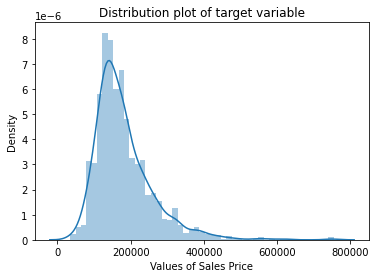

In [23]:
# plot distribution plot of target variable
sns.distplot(data.SalePrice)
plt.title("Distribution plot of target variable")
plt.xlabel("Values of Sales Price")
plt.ylabel("Density")
plt.show()

We see that majority of sale price is in range less than 4 lakhs.

##Univariate analysis

###Numeric columns

In [24]:
#display sample data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,...,TA,0,61,0,F_e_None,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,...,TA,298,0,0,F_e_None,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,...,TA,0,42,0,F_e_None,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,...,TA,0,35,272,F_e_None,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,...,TA,192,84,0,F_e_None,12,2008,WD,Normal,250000


We also see that the "Id" variable is just the sample number and doesnt have effect on target variable. Hence it can be dropped

In [25]:
#Drop instant variable
data.drop(["Id"],axis =1,inplace =True  )

Now lets see spread of the numeric columns using boxplots.

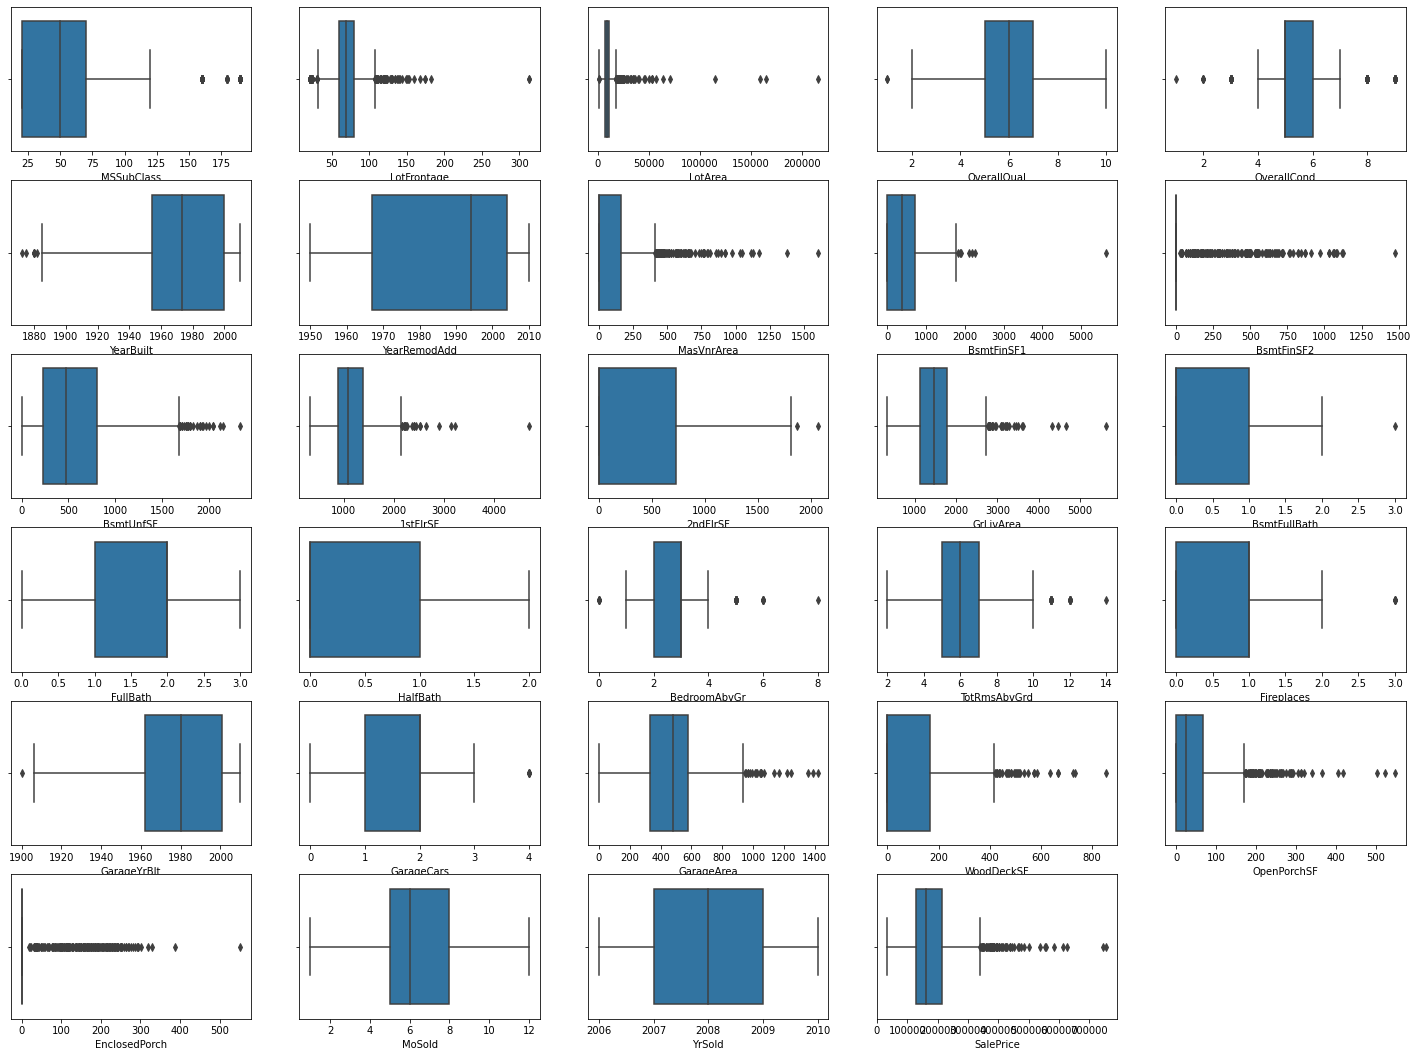

In [26]:
# create list of numeric col names
num_list= list(data.select_dtypes(include=['int64','float64']).columns)
#show boxplot of of numeric col names
plt.figure(figsize=[25,25])
count=1
for i,col in enumerate(num_list):
    plt.subplot(8,5,i+1)
    sns.boxplot(x = col, data=data)
plt.show()

####Insight

We see outliers in many of the variables. Lets remove the outliers since they will affect the model performance. 

###Outlier removal

We will consider data points outside the IQR( inter quartile range) range as outliers.
Lets create function to remove the outlier.

In [27]:
# Function to remove outlier
def remov_outlier(df,col_name):
  # Get Q1 and Q3
  Q1 = df[col_name].quantile(.25)
  Q3 = df[col_name].quantile(.75)
  # find inter quantile range
  IQR = Q3 - Q1
  # find acceptance region
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  # remove data outside acceptance region
  df_without_outlier = df[(df[col_name] >lower_limit) & (df[col_name] < upper_limit) ]
  # return cleaned dataset
  return df_without_outlier


Now lets apply the function and remove the outliers.

In [28]:
# create new dataframe
data_cleaned = data
# apply function to each numeric column
for i in num_list:
  data_cleaned = remov_outlier(data_cleaned,"SalePrice")

Lets test if oulier removed with the target column as an example.

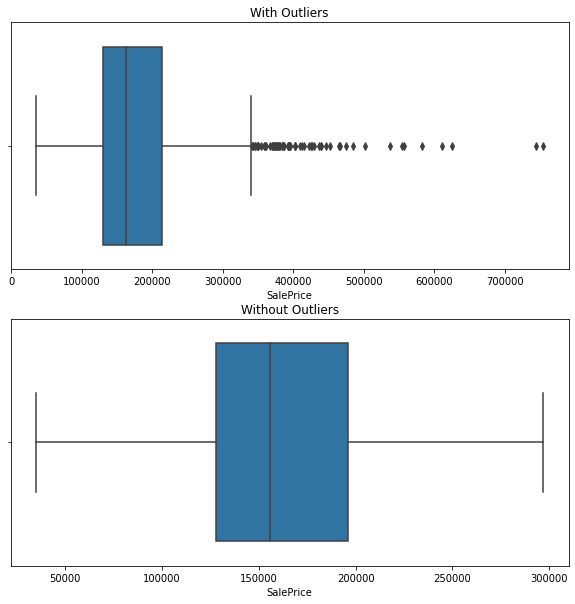

In [29]:
# plot target variable before and after outlier removal
plt.figure(figsize=[10,10])
plt.subplot(2,1,1)
plt.title("With Outliers")
sns.boxplot(data.SalePrice)
plt.subplot(2,1,2)
plt.title("Without Outliers")
sns.boxplot(data_cleaned.SalePrice)
plt.show()


Hence we see that outliers have been removed.

ii) Categorical variables

Lets plot count plots for categorical variables.

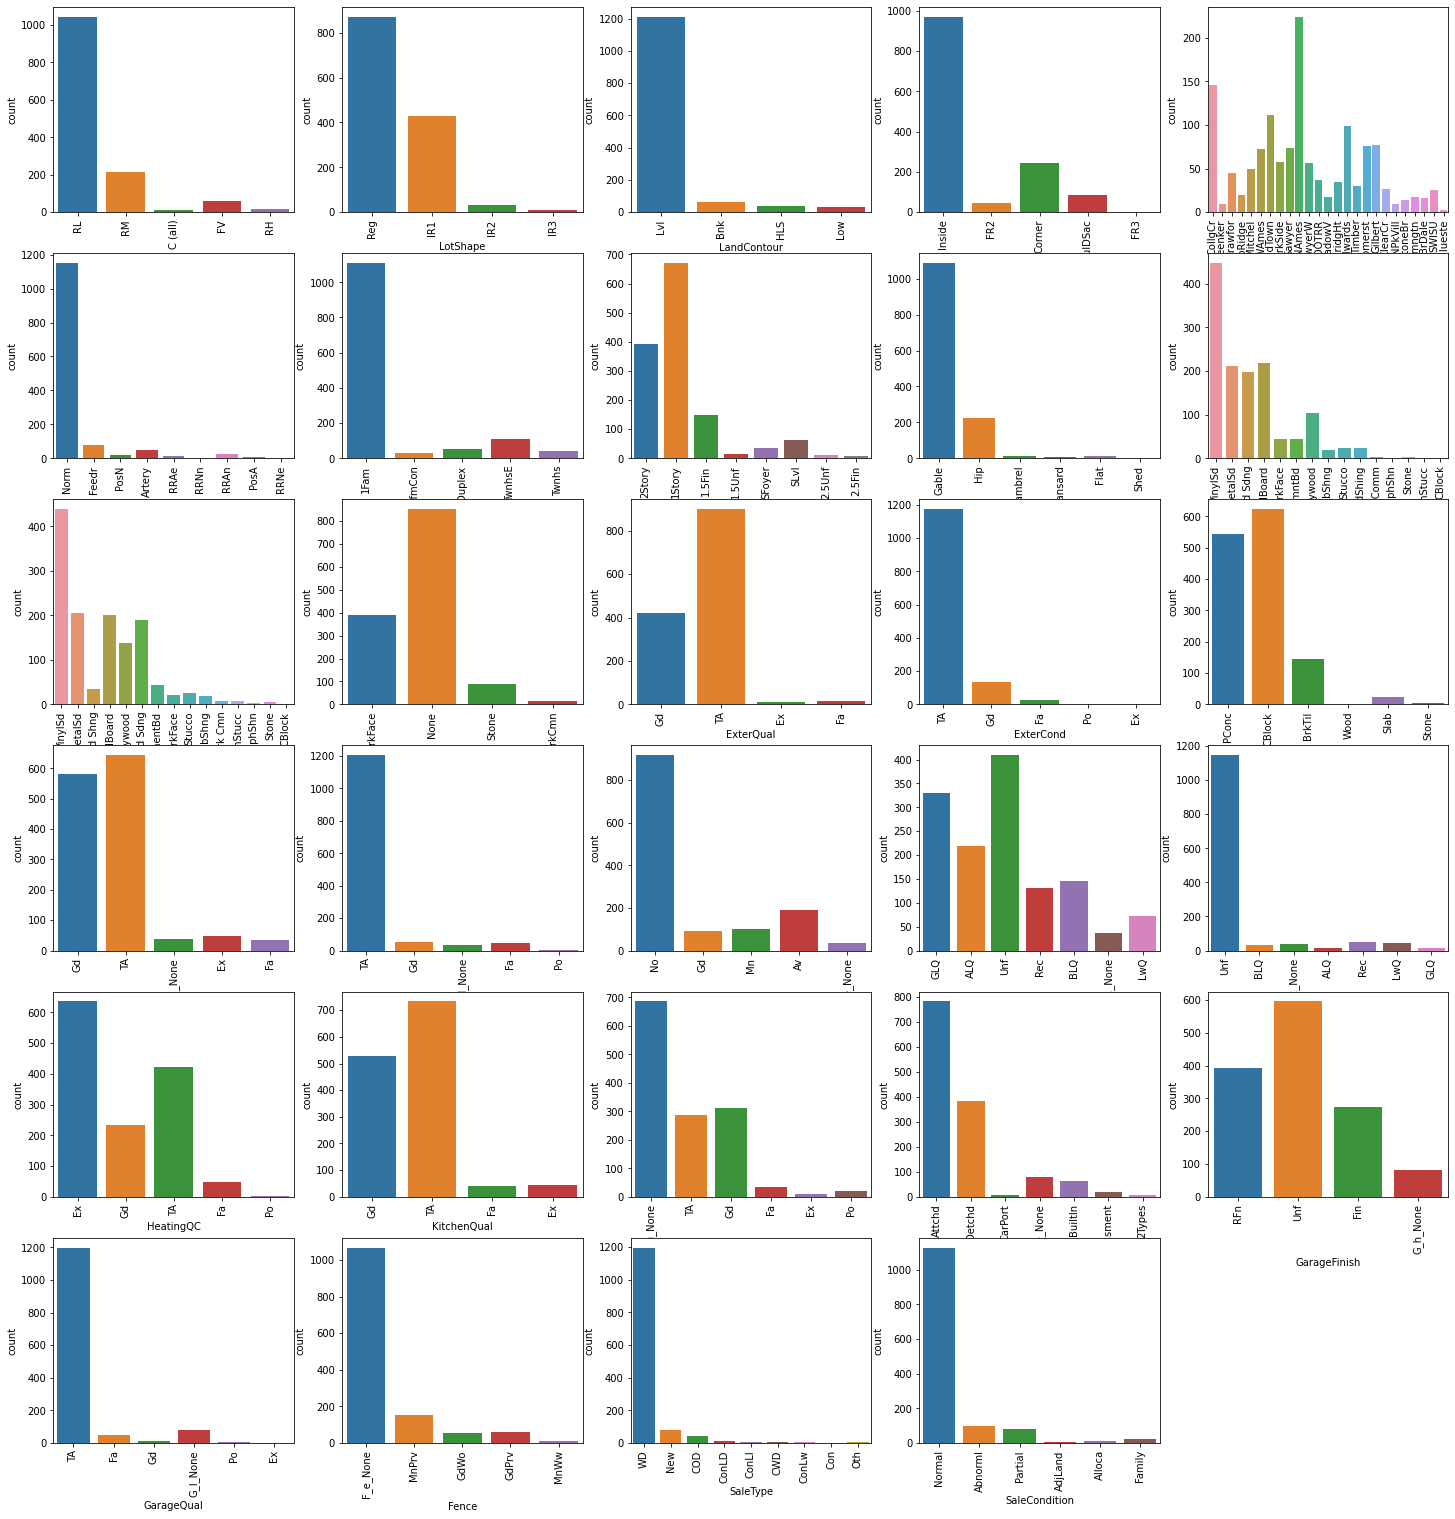

In [30]:
# create list of categorical col names
cat_list= list(data.select_dtypes(include=['object']).columns)
#show countplot of categorical col names
plt.figure(figsize=[25,40])
for i,col in enumerate(cat_list):
    plt.subplot(9,5,i+1)
    sns.countplot(col, data=data_cleaned)
    plt.xticks(rotation =90)
plt.show()
#

####Insights
We see that data is well spread out among different categories.
In some categories like SaleCondition majority of data is present in one category.

##Creating new derieved columns

From the data dictionary we understand that "YearBuilt"  gives original construction date and "YearRemodAdd" gives remodel date which is same as construction date if no remodeling or additions was done. Also "YrSold" is also given. So we can find age of house when it was sold which by our business understanding is a better predictor of sale price. For remodelled houses, age should be calculated from remodelled date. So age will be difference between "YrSold" and "YearRemodAdd". As "YearRemodAdd" is same as construction date if no remodeling or additions was done, this works for not remodelled houses also. So lets create the age of house and create "RemodelAge" col.


In [31]:
# function to get age of house
def get_RemodelAge(df):
  return df['YrSold'] - df['YearRemodAdd']
# create new "RemodelAge" col
data_cleaned['RemodelAge'] = data_cleaned.apply(get_RemodelAge, axis=1)

One thing to notice is that age of house doesnt specify if the house was remodelled of not. Hence it better to create a separate binary col "RemodStatus" which will be 0 if "YearBuilt" is same as "YearRemodAdd" and 1 if otherwise. Lets create new col.

In [32]:
# function to check if house is remodelled or not.
def get_RemodStatus(df):
    if(df['YearBuilt'] == df['YearRemodAdd']):
        return 0
    elif(df['YearBuilt'] < df['YearRemodAdd']):
        return 1
    else:
        return 2
# create new col "RemodStatus"
data_cleaned['RemodStatus'] = data_cleaned.apply(get_RemodStatus, axis=1)
#check for values in new col
data_cleaned['RemodStatus'].value_counts()

0    716
1    628
Name: RemodStatus, dtype: int64

Lets drop the original variables that were used to create new cols as their information is already captured by newly created columns.

In [33]:
# drop original cols
data_cleaned.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis = 1, inplace = True)

Lets do univariate analysis of newly created columns.

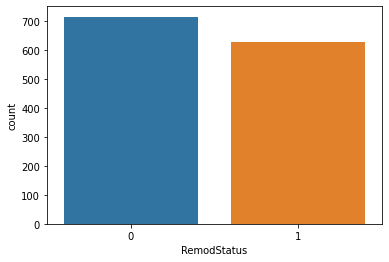

In [34]:
# count plot of RemodStatus
sns.countplot(data_cleaned.RemodStatus)
plt.show()

There is almost equal samples of remodelled and non remodelled houses.

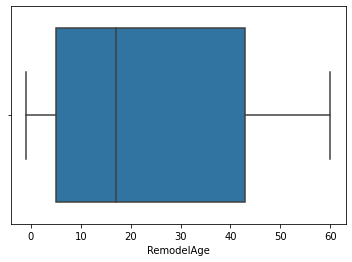

In [35]:
# boxplot of RemodelAge
sns.boxplot(data_cleaned.RemodelAge)
plt.show()

House if remodlled have ages between 5 to 45 years range.

##Bivariate analysis

Lets first see correlation between variables using heatmap.

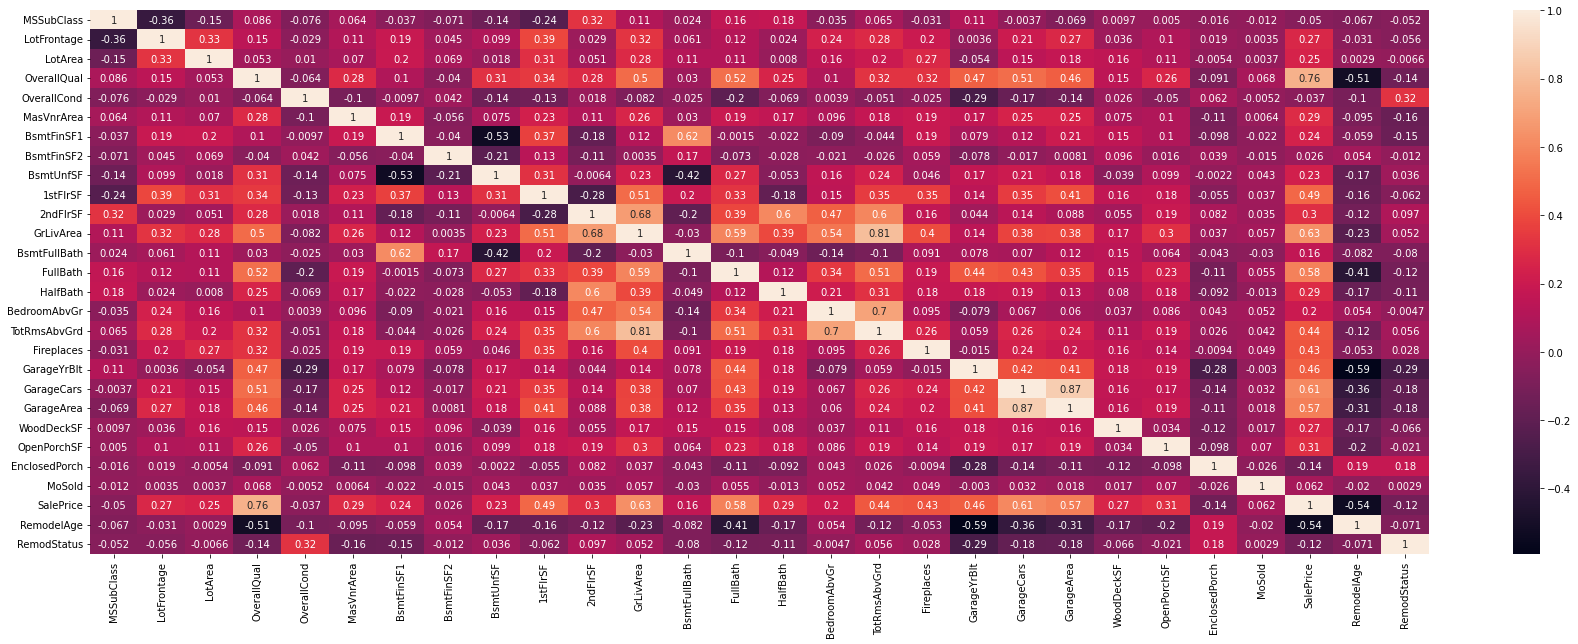

In [36]:
#Correlation matrix for the dataset
plt.figure(figsize=(30,10))
sns.heatmap(data_cleaned.corr(), annot=True)
plt.show()

If we look at SalePrice row, we see some variables like "OverallCond" and "GarageArea" are highly correlated with our target variable. Hence these could be important predictors of sale price.

We also see that there is high correlation between variables other than target. Hence some of these should be dropped to reduce multicollinarity which could affect our model performance.

Lets see varaibles with correlation more than 0.8.

In [37]:
# create correlation matrix
cor_matrix = data_cleaned.corr().abs()
# extract upper triangle
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
# select variable with coorelation > 80% from upper triangle.
col_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
col_corr

['TotRmsAbvGrd', 'GarageArea']

So we see that'TotRmsAbvGrd' and 'GarageArea' can be dropped as seen from their correlation values from heatmap.
- We can see 'TotRmsAbvGrd' and 'GrLivArea' have a collinearity of 81% .
- Also 'GarageCars' and 'GarageArea' have a collinearity of 87%.

In [38]:
#Removing highly collinear features as discussed above.
data_cleaned.drop(['TotRmsAbvGrd', 'GarageArea'], axis=1, inplace=True)



In [39]:
# update num_list
num_list= list(data_cleaned.select_dtypes(include=['int64','float64']).columns)


Lets see shape of dataset now

In [40]:
data_cleaned.shape

(1344, 55)

####Numreric columns

 For numeric columns, lets plot scatter plot with target variable.

<Figure size 720x360 with 0 Axes>

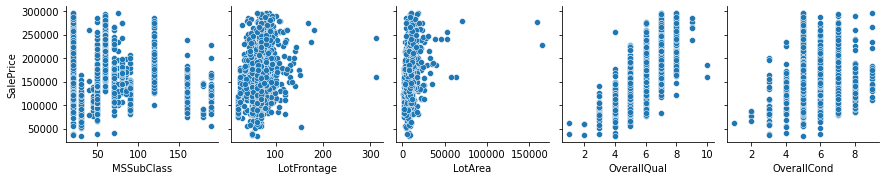

<Figure size 720x360 with 0 Axes>

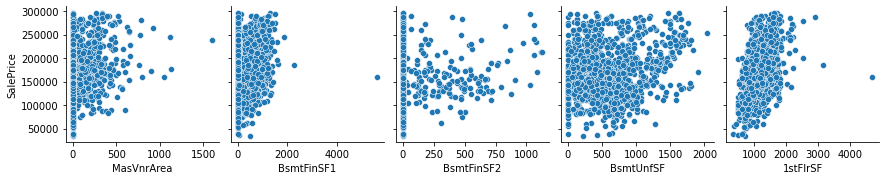

<Figure size 720x360 with 0 Axes>

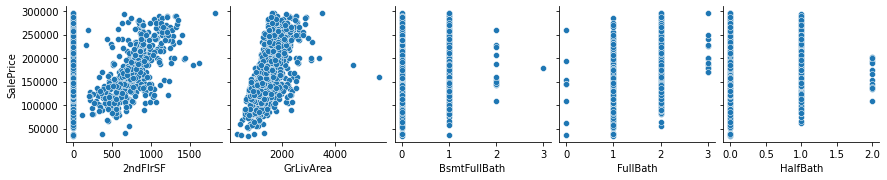

<Figure size 720x360 with 0 Axes>

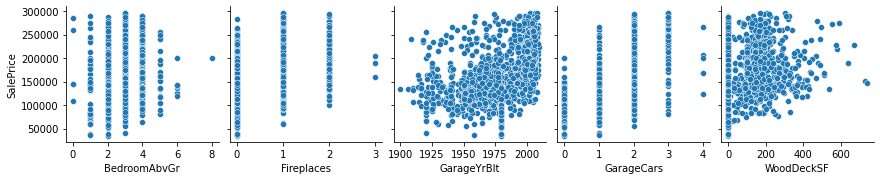

<Figure size 720x360 with 0 Axes>

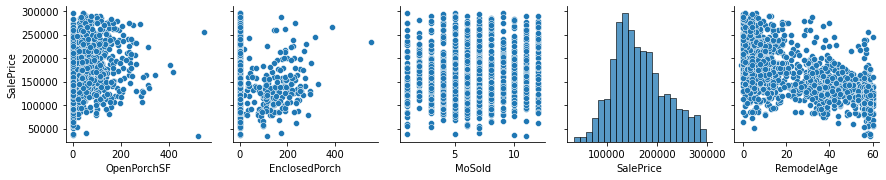

<Figure size 720x360 with 0 Axes>

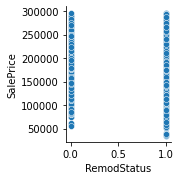

In [41]:
# scatter plot of numeric cols with target variable
for i in range(0, len(num_list), 5):  
  plt.figure(figsize=(10,5))
  sns.pairplot(data_cleaned, x_vars=num_list[i:i + 5], y_vars='SalePrice',kind='scatter')
  plt.show()

####Insights
We see that variables  'LotArea', '1stFlrSF'and 'GrLivArea' which show some linear realtion with 'SalePrice'.Hence these could be good predictor variables. Other variables are mostly scattered wrt sale price.

####Categorical variables

For categorical variables, we will be plotting box plot wrt target variable across its categories.

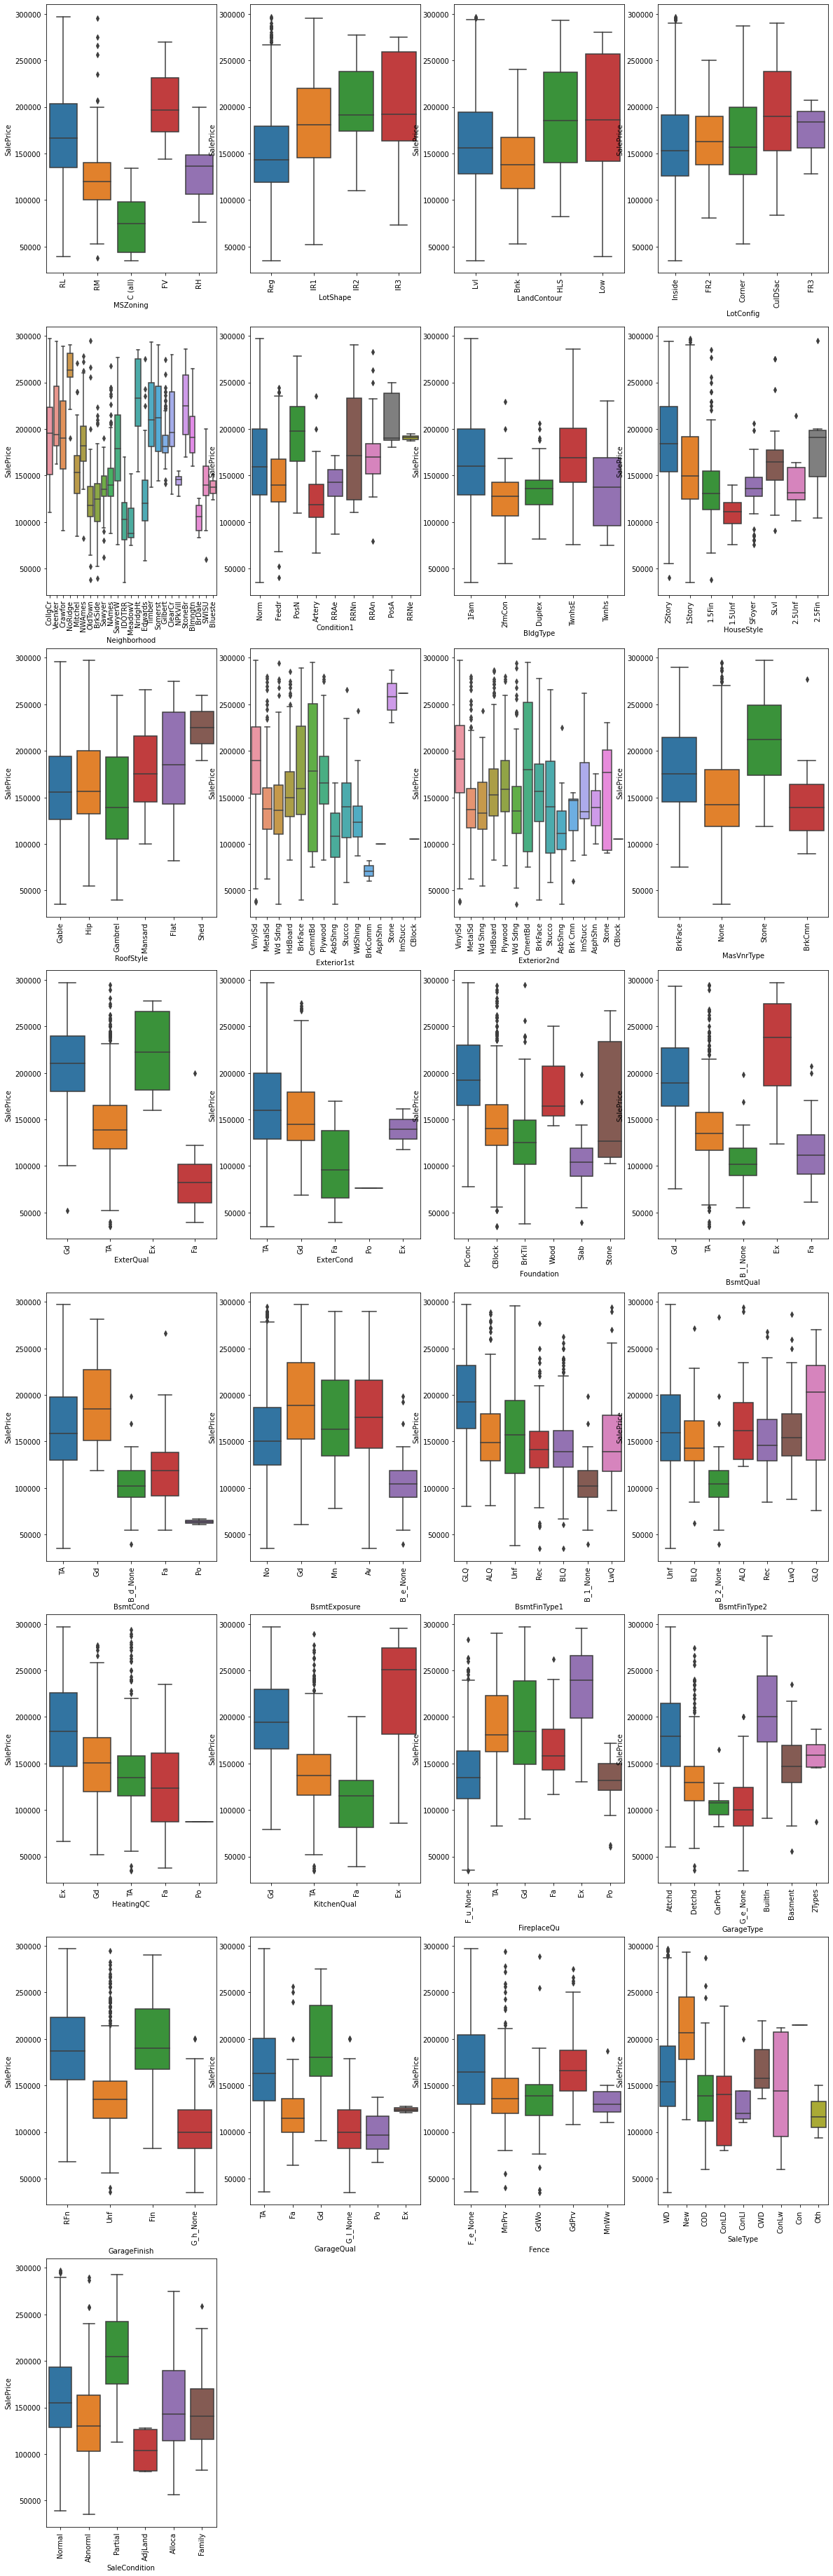

In [42]:
cat_list = list(data_cleaned.select_dtypes(include=['object']).columns)
plt.figure(figsize = (20,100))
for i,col in enumerate(cat_list):
  plt.subplot(12,4,i+1)
  sns.boxplot(x = col,y = "SalePrice", data = data_cleaned)
  plt.xticks(rotation = 90)


####Insights
We see sale price difference across categories for features like "Central Air","Paved Drive" and "Street" and hence can be good predictors.
While LogConfig doesnt show much diiference in sale price across its categories.

#Data Preparation

####Dummy variable creation for categorical avriables.

We need to convert categorical variables to numeric as model inputs should be numeric. We create dummy variables for this. p categories create (p-1) dummy variables.


In [43]:
for i in cat_list:
  # create dummy variables and drop first category
  dum_df = pd.get_dummies(data_cleaned[i],prefix = i, drop_first=True)
  # join with original data frame
  data_cleaned = pd.concat([data_cleaned,dum_df] , axis=1)
  # Drop original categorical variable
  data_cleaned = data_cleaned.drop(i, axis=1)

Lets see data shape after dummy variables creation.

In [44]:
data_cleaned.shape

(1344, 198)

####Creating train and test data.

Create train and test split with 70% data used for training.

Split data into train and test sets. Test set will be unseen data and will be used to test the model performance.

In [45]:
#split data using 70:0 ratio
df_train, df_test = train_test_split(data_cleaned,train_size =0.70,test_size=0.30, random_state =100)


Lets see train and test data shapes.

In [46]:
df_train.shape

(940, 198)

In [47]:
df_test.shape

(404, 198)

So the split has worked perfectly.

###Scaling

We will use MinMax scaler and scale variables between range 0 and 1. This will help in better interpretation of model coefficients. We will fit and transform on train data and only transform on test data as test data is unseen data to be used for model evaluation.

In [48]:
# Create MinMaxScaler object
scaler = MinMaxScaler()
col = list(df_train.columns)
# Using MinMaxScaler for scaling train
df_train[col] = scaler.fit_transform(df_train[col])
col = list(df_test.columns)
# Using MinMaxScaler for scaling test data.
df_test[col] = scaler.transform(df_test[col])


Lets see if variables got scaled

In [49]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,...,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,0.235075,0.160784,0.051674,0.543972,0.513222,0.053570,0.072243,0.042822,0.287523,0.179516,...,0.003191,0.004255,0.057447,0.003191,0.890426,0.002128,0.007447,0.010638,0.848936,0.060638
std,0.261974,0.076073,0.053466,0.134688,0.156502,0.098884,0.076312,0.147280,0.221959,0.082953,...,0.056433,0.065129,0.232818,0.056433,0.312525,0.046102,0.086019,0.102647,0.358302,0.238793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.034988,0.444444,0.428571,0.000000,0.000000,0.000000,0.110907,0.121615,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.164384,0.046633,0.555556,0.428571,0.000000,0.062367,0.000000,0.242265,0.165099,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.352941,0.185788,0.059503,0.666667,0.571429,0.081250,0.117337,0.000000,0.420294,0.228086,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
df_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,...,404.000000,404.000000,404.000000,404.0,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.192705,0.166376,0.053041,0.542904,0.515912,0.046617,0.068594,0.043728,0.299048,0.178967,...,0.002475,0.002475,0.064356,0.0,0.888614,0.004950,0.009901,0.024752,0.816832,0.064356
std,0.234352,0.066809,0.035513,0.135887,0.166888,0.085765,0.066971,0.135467,0.226976,0.074327,...,0.049752,0.049752,0.245691,0.0,0.315000,0.070272,0.099133,0.155562,0.387284,0.245691
min,0.000000,0.000000,-0.001171,0.000000,-0.142857,0.000000,0.000000,0.000000,0.000000,0.023864,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.036827,0.444444,0.428571,0.000000,0.000000,0.000000,0.116020,0.124771,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.164384,0.049053,0.555556,0.428571,0.000000,0.065025,0.000000,0.253015,0.166017,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.235294,0.184932,0.059805,0.666667,0.571429,0.069062,0.118001,0.000000,0.424095,0.218736,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,0.551370,0.424529,0.888889,1.000000,0.705625,0.278703,1.006250,1.070792,0.502524,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So scaling has worked perfectly.

Now lets create x_train and y_train

In [51]:
# pop out the target variable to get y_train
y_train = df_train.pop('SalePrice')
#rest becomes X_train
X_train = df_train


#Model Building and evaluation

We will be building a Linear Regression model.

Lets use RFE to automate feature selection and select top 50 features.

In [52]:
# Create linear regression object
lr = LinearRegression()
# fit object to train data
lr.fit(X_train, y_train)
# Select top 15 features using RFE
rfe = RFE(lr, n_features_to_select =50)      
# fit rfe to data      
rfe = rfe.fit(X_train, y_train)


Lets see the result of RFE

In [53]:
# show list of variable , their RFE status and RFE ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 102),
 ('BsmtFinSF1', False, 142),
 ('BsmtFinSF2', False, 73),
 ('BsmtUnfSF', False, 91),
 ('1stFlrSF', False, 104),
 ('2ndFlrSF', False, 71),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', False, 52),
 ('BedroomAbvGr', False, 37),
 ('Fireplaces', False, 80),
 ('GarageYrBlt', False, 103),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 110),
 ('OpenPorchSF', False, 62),
 ('EnclosedPorch', False, 145),
 ('MoSold', False, 69),
 ('RemodelAge', False, 9),
 ('RemodStatus', False, 147),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 38),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 132),
 ('LandContour_HLS', False, 36),
 ('LandContour_Low', False, 34),
 ('LandContour_Lvl', False, 35),
 ('LotConfig_CulDSac

Lets get the 50 selected variables.

In [54]:
# variables supported by rfe
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'GarageCars', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_RRAe', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_Stone', 'Exterior2nd_CBlock', 'Exterior2nd_Stone',
       'Exterior2nd_Wd Shng', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_Stone', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_TA', 'BsmtExposure_B_e_None',
       'BsmtExposure_Gd', 'BsmtFinType1_B_1_None', 'BsmtFinType2_B_2_None',
       'KitchenQual_Fa', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_G_e_None',
       'GarageFinish_G_h_None', 'G

Now finally lets create the X_train with the selected features that will be used for training the model.

We will be using Sklearn module to create the model.

We will create final x_train using these features and create model using sklearn

In [55]:
# Make X_train_reg by using only finally selected variables
X_train_reg = X_train[col]
# Create LR object using sklearn
lr_model = LinearRegression()
# fit the model with X_train_reg,y_train
lr_model.fit(X_train_reg,y_train)



LinearRegression()



Now lets see the coefficients and intercept of the model


In [56]:
# Coefficients of the model
lr_model.coef_



array([-0.10388748, -0.13662049,  0.23877366,  0.3778561 ,  0.12224941,
        0.63352944,  0.11550043,  0.0676174 ,  0.21493871,  0.13916609,
        0.14368124,  0.15878502,  0.11226726, -0.25195842,  0.09491803,
        0.08950675,  0.11485906,  0.06437804,  0.1099222 ,  0.08682239,
       -0.07794491,  0.0534505 , -0.03493654,  0.11409166, -0.03493654,
       -0.07458595, -0.07386792,  0.18450656,  0.17037281,  0.12107054,
        0.06878711,  0.04395385, -0.04286104,  0.02311898, -0.0106023 ,
        0.00947728,  0.00824049, -0.01360949,  0.06348702, -0.01360949,
       -0.01360949, -0.02130639,  0.13694476,  0.09158446,  0.14426383,
        0.09647255,  0.04572564,  0.04572564,  0.04572564, -0.11551527])

Lets create data frame of varaibles and their model coefficients.

In [57]:
# create dataframe of coefficients
coefficients = pd.DataFrame({"features": col, "coefficients": lr_model.coef_})
# sort by value of coefficients 
coefficients.sort_values("coefficients",ascending=False, inplace = True)
coefficients

,features,coefficients
5,GrLivArea,0.633529
3,OverallQual,0.377856
2,LotArea,0.238774
8,GarageCars,0.214939
27,ExterQual_Fa,0.184507
28,ExterQual_Gd,0.170373
11,MSZoning_RL,0.158785
44,GarageType_BuiltIn,0.144264
10,MSZoning_RH,0.143681
9,MSZoning_FV,0.139166


#####We see that the top 3 positive predictors are :
1 	GrLivArea 	
2 	OverallQual 	
3 	LotArea 	
#####We see that the top 3 negative predictors are :
1   LotShape_IR3 	
2 	LotFrontage 	
3  	GarageQual_Po 

In [58]:
# Intercept value
lr_model.intercept_

-0.4513881076843552

####Model prediction on test set

Now lets make prediction using model on unseen data ie test data. 

 Lets create X and y for test data.


In [59]:
# create x and y for test data
y_test = df_test.pop('SalePrice')
X_test = df_test

Lets create final X for test by selecting only the selected features.

In [60]:
# Creating X_test_reg out of the significant variables col_list
X_test_reg = X_test[col]



Now predict on train data and find R2 train values for the model created.

In [61]:
# Get the predicted values of target variable on train
y_train_pred = lr_model.predict(X_train_reg)
# R2 score on train data
R2_train = r2_score(y_train,y_train_pred)
# Calculating the Adjusted R2 value using formula
# no of samples
n = len(X_train_reg.index)
# no of final features
p = len(lr_model.coef_)
Adj_R2_train = 1-(1-R2_train)*(n-1)/(n-p-1)
Adj_R2_train

0.8351934267592623

Good R2 score of 0.83. This is expected as prediction is on train data on which the model was trained.



Now lets predict for test data.


In [62]:
# Predicting the values for test data
y_test_pred = lr_model.predict(X_test_reg)




Lets evaluate the model performance on test data. Lets visulaiz the results first.


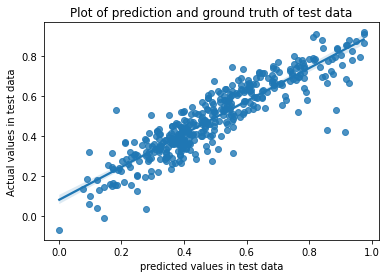

In [63]:
# Plotting a regplot between y_test and y_pred
sns.regplot(y_test,y_test_pred)
plt.title("Plot of prediction and ground truth of test data")
plt.xlabel("predicted values in test data")
plt.ylabel("Actual values in test data")
plt.show()

The model looks like a good fit visually. Now lets see R2 score on unseen test data.

In [64]:
# R2 score on test data
R2_test = r2_score(y_test,y_test_pred)
R2_test

0.8076355409868945

In [65]:
# Calculating the Adjusted R2 value using formula
# no of samples
n = len(X_test.index)
# no of final features
p = len(lr_model.coef_)
Adj_R2_test = 1-(1-R2_test)*(n-1)/(n-p-1)
Adj_R2_test

0.7803884504751232

Adjusted R2 for train is 0.83 while for test data is 0.77. This shows that overfitting has happened. So we will now use regularisation to create new model without overfitting.

Lets see mean square error of the model created.

In [66]:
# calculate mean square eroor
mse = mean_squared_error(y_test, y_test_pred)
mse

0.00765892631861328

Lets get 5 

#Ridge Regularisation

We will first use Ridge regression. This reduce variance in model by adding a penalty term (L2 regularisation) which is sum of squared coefficients to the cost function. This helps to reduce complexity in model.

Lets first train and test data.

In [67]:
# Creating X_test_reg out of the significant variables col_list
X_test_reg = X_test[col]
X_train_reg = X_train[col]

####Hyper parameter tuning

We will find best alpha value for ridhe estimator using cross validation and grid search for a range of lambda values.

In [68]:
# list of alpha values to be used for tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# create ridge object
ridge = Ridge()

# cross validation
# no of folds
folds = 5
# do grid search with ridge estimator and neg_mean_absolute_error metric for the given lambda values
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
# fit model on train data          
ridge_model_cv.fit(X_train_reg, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Lets see result of the tuning.

In [69]:
# show results
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003513,0.000429,0.002190,0.000058,0.0001,{'alpha': 0.0001},-0.062468,-0.060682,-0.055609,-0.059683,...,-0.060947,0.003494,4,-0.055173,-0.057351,-0.058164,-0.057050,-0.055152,-0.056578,0.001212
1,0.003687,0.000418,0.002299,0.000055,0.001,{'alpha': 0.001},-0.062470,-0.060683,-0.055606,-0.059682,...,-0.060946,0.003495,3,-0.055173,-0.057352,-0.058165,-0.057050,-0.055152,-0.056579,0.001212
2,0.003411,0.000062,0.002236,0.000102,0.01,{'alpha': 0.01},-0.062487,-0.060693,-0.055580,-0.059673,...,-0.060943,0.003502,2,-0.055179,-0.057361,-0.058178,-0.057054,-0.055156,-0.056586,0.001215
3,0.003451,0.000402,0.002203,0.000038,0.1,{'alpha': 0.1},-0.062650,-0.060800,-0.055404,-0.059614,...,-0.060937,0.003556,1,-0.055258,-0.057458,-0.058318,-0.057105,-0.055222,-0.056672,0.001234
4,0.005139,0.002469,0.002268,0.000104,0.2,{'alpha': 0.2},-0.062810,-0.060941,-0.055255,-0.059625,...,-0.060963,0.003607,5,-0.055374,-0.057569,-0.058498,-0.057211,-0.055314,-0.056793,0.001256


We will plot train and test scores to get best alpha

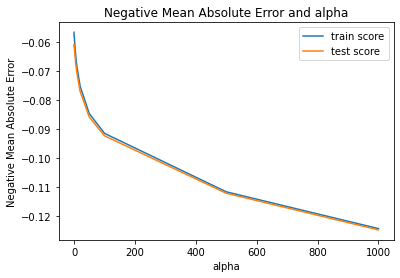

In [70]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

Alpha range seems to be close to zero. Lets get the best alpha value.

In [71]:
# get the best estimator for lambda
ridge_model_cv.best_params_



{'alpha': 0.1}

Now lets build the model with best alpha value.

In [72]:
# train model with the best alpha value

alpha = 0.1
ridge = Ridge(alpha=alpha)
# train the model
ridge.fit(X_train_reg, y_train)
# show model coefficients
ridge.coef_

array([-0.10246071, -0.12789587,  0.22957777,  0.37709095,  0.12202057,
        0.61629972,  0.11516884,  0.07192258,  0.21422503,  0.12859157,
        0.13382867,  0.14970571,  0.10336681, -0.24297462,  0.09499069,
        0.08985346,  0.11333402,  0.0648553 ,  0.10864222,  0.08555903,
       -0.07600054,  0.05353455, -0.03029464,  0.11025036, -0.03029464,
       -0.07137406, -0.07303463,  0.1695455 ,  0.16256879,  0.11255046,
        0.06523633,  0.04339272, -0.04233911,  0.02330353, -0.01030345,
        0.0084854 ,  0.00748496, -0.01405368,  0.0637043 , -0.01405368,
       -0.01405368, -0.02018086,  0.13075502,  0.08369959,  0.13784809,
        0.09001792,  0.04337618,  0.04337618,  0.04337618, -0.10567335])

Lets plot the test results.

Now lets evaluate ridge model. Lets see train and test R2 score.

In [73]:
# preidcton train and test data
y_pred_train_ridge = ridge.predict(X_train_reg)
y_pred_test_ridge = ridge.predict(X_test_reg)
# show R2 score on train and test data
R2_train_ridge = round(r2_score(y_train, y_pred_train_ridge),2)
R2_test_ridge  = round(r2_score(y_test, y_pred_test_ridge),2)
print("Ridge Train R2-Score : ", R2_train_ridge)
print("Ridge Test R2-Score : ", R2_test_ridge)

Ridge Train R2-Score :  0.84
Ridge Test R2-Score :  0.81


In [74]:
# no of samples
n = len(X_train_reg.index)
# no of final features
p = len(ridge.coef_)
Adj_R2_train_ridge = 1-(1-R2_train_ridge)*(n-1)/(n-p-1)

n = len(X_test_reg.index)
# no of final features
p = len(ridge.coef_)
Adj_R2_test_ridge = 1-(1-R2_test_ridge)*(n-1)/(n-p-1)
print("Adjusted Ridge Train R2-Score : ",Adj_R2_train_ridge)
print("Adjusted Ridge Test R2-Score : ",Adj_R2_test_ridge)

Adjusted Ridge Train R2-Score :  0.8310011248593925
Adjusted Ridge Test R2-Score :  0.7830878186968839


We see that R2 score on  data test has improved is closer to train data. Hence it has reduced overfitting. 

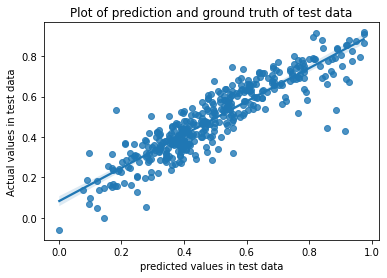

In [75]:
# Plotting a regplot between y_test and y_pred for ridge model
sns.regplot(y_test,y_pred_test_ridge)
plt.title("Plot of prediction and ground truth of test data")
plt.xlabel("predicted values in test data")
plt.ylabel("Actual values in test data")
plt.show()

Lets see mean square error also.

In [76]:
mse_ridge = mean_squared_error(y_test, y_pred_test_ridge)
mse_ridge

0.007544674505993072

Though mean square error reduced but is still negligible difference.

Lets get coeffients of each feature.

In [77]:
# Create dataframe with the significant features and the their respective coefficeints
coefficients = pd.DataFrame({"features": col, "coefficients": ridge.coef_})
coefficients.sort_values(by = 'coefficients',ascending = False, inplace = True)
coefficients

,features,coefficients
5,GrLivArea,0.616300
3,OverallQual,0.377091
2,LotArea,0.229578
8,GarageCars,0.214225
27,ExterQual_Fa,0.169546
28,ExterQual_Gd,0.162569
11,MSZoning_RL,0.149706
44,GarageType_BuiltIn,0.137848
10,MSZoning_RH,0.133829
42,GarageType_Attchd,0.130755


Lets get top 5 predictors

In [78]:
# Create dataframe with the significant features and the their respective coefficeints
coefficients = pd.DataFrame({"features": col, "coefficients": abs(ridge.coef_)})
coefficients.sort_values(by = 'coefficients',ascending = False, inplace = True)
coefficients.head(5)

,features,coefficients
5,GrLivArea,0.616300
3,OverallQual,0.377091
13,LotShape_IR3,0.242975
2,LotArea,0.229578
8,GarageCars,0.214225


#Lasso Regularisation

We will now use Lasso regression. This reduce variance in model by adding a penalty term (L1 regularisation) which is sum of absolute value of coefficients to the cost function. This helps to reduce complexity in model.
It also has added advantage that it reduce some coeffiencts to zero and hence help in feature selection as well.

####Hyper parameter tuning

We will find best alpha value for ridhe estimator using cross validation and grid search for a range of lambda values.

In [79]:
# list of alpha values to be tuned for
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# crete lasso object
lasso = Lasso()

# cross validation
# no of folds
folds = 5
# do grid search with lasso estimator and neg_mean_absolute_error metric for the given lambda values
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)       
# fit on train data     
lasso_model_cv.fit(X_train_reg, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Now lets see results

In [80]:
# show result
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009475,0.001758,0.002258,0.000196,0.0001,{'alpha': 0.0001},-0.063839,-0.061602,-0.056098,-0.060045,...,-0.061526,0.003390,1,-0.055634,-0.058147,-0.058916,-0.057573,-0.055667,-0.057187,0.001325
1,0.003790,0.000153,0.002309,0.000113,0.001,{'alpha': 0.001},-0.065651,-0.068908,-0.062431,-0.063326,...,-0.065928,0.002810,2,-0.061735,-0.064524,-0.065602,-0.064756,-0.062259,-0.063775,0.001505
2,0.003882,0.000649,0.002252,0.000128,0.01,{'alpha': 0.01},-0.105877,-0.103083,-0.108196,-0.104455,...,-0.106898,0.003436,3,-0.107094,-0.104262,-0.106024,-0.106861,-0.106056,-0.106059,0.000995
3,0.003462,0.000438,0.003144,0.001505,0.1,{'alpha': 0.1},-0.159081,-0.159594,-0.162719,-0.151989,...,-0.160585,0.005691,4,-0.161101,-0.159838,-0.160000,-0.162501,-0.157433,-0.160174,0.001669
4,0.003237,0.000055,0.002293,0.000120,0.2,{'alpha': 0.2},-0.159081,-0.159594,-0.162719,-0.151989,...,-0.160585,0.005691,4,-0.161101,-0.159838,-0.160000,-0.162501,-0.157433,-0.160174,0.001669


We will plot train and test scores to get best alpha

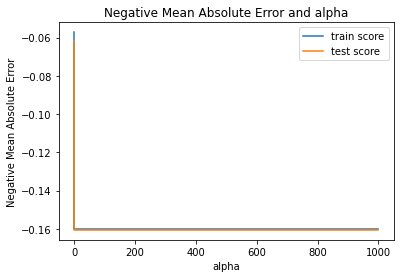

In [81]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

Alpha value is much more closer to zero than in ridge.
Lets get best aplha value.

In [82]:
# get the best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

Lets train using best alpha value.

In [83]:
# train with best alpha value
alpha = 0.0001
lasso = Lasso(alpha=alpha)
# fit on train data
lasso.fit(X_train_reg, y_train)
# show model coefficients
lasso.coef_

array([-9.62669492e-02, -1.03315951e-01,  1.84071349e-01,  3.81542060e-01,
        1.23632504e-01,  6.19603815e-01,  1.13417307e-01,  6.53625458e-02,
        2.02804426e-01,  6.27010648e-02,  6.32712732e-02,  8.80816468e-02,
        4.11965819e-02, -2.30938082e-01,  8.52153380e-02,  7.82872126e-02,
        1.03947674e-01,  6.38139066e-02,  9.50868913e-02,  6.70579489e-02,
       -5.92978503e-02,  5.02338067e-02, -0.00000000e+00,  5.27070268e-02,
       -0.00000000e+00, -3.16752340e-02, -6.33689548e-02,  8.82946346e-02,
        1.26628384e-01,  7.17118857e-02,  2.61047555e-02,  4.75288449e-02,
       -2.50410351e-02,  3.46080587e-02, -0.00000000e+00,  3.44010997e-03,
        4.22506180e-03, -3.37154256e-02,  6.36561885e-02, -0.00000000e+00,
       -0.00000000e+00, -9.35349902e-03,  7.73940167e-02,  1.65800639e-02,
        7.85802500e-02,  3.41648836e-02,  6.94573400e-02,  2.74244011e-17,
        7.41200031e-19, -1.00724928e-02])

Lets see number of features selected by the model.

In [84]:
# find number of non zero coefficients
np.count_nonzero(lasso.coef_)

45

We see that 6 model coefficnets are zero. Hence lasso has helped in feature selection. Now lets evaluate the model.

In [85]:
# predict on train and test data
y_pred_train_lasso = lasso.predict(X_train_reg)
y_pred_test_lasso = lasso.predict(X_test_reg)
# find R2 on train and test
R2_train_lasso = round(r2_score(y_train, y_pred_train_lasso),2)
R2_test_lasso  = round(r2_score(y_test, y_pred_test_lasso),2)
print("Lasso Train R2-Score : ",R2_train_lasso)
print("Lasso Test R2-Score : ",R2_test_lasso)

Lasso Train R2-Score :  0.84
Lasso Test R2-Score :  0.82


In [86]:
# no of samples
n = len(X_train_reg.index)
# no of final features
p = len(lasso.coef_)
Adj_R2_train_lasso = 1-(1-R2_train_lasso)*(n-1)/(n-p-1)

n = len(X_test_reg.index)
# no of final features
p = len(lasso.coef_)
Adj_R2_test_lasso = 1-(1-R2_test_lasso)*(n-1)/(n-p-1)
print("Adjusted Lasso Train R2-Score : ",Adj_R2_train_lasso)
print("Adjusted Lasso Test R2-Score : ",Adj_R2_test_lasso)

Adjusted Lasso Train R2-Score :  0.8310011248593925
Adjusted Lasso Test R2-Score :  0.7945042492917846


There is improvement in R2 score wrt ridge model.

In [87]:
# mean square error
mse_lasso = mean_squared_error(y_test, y_pred_test_lasso)
mse_lasso


0.0071604907723499

It is lower than ridge model.

Lets visualise the result of prediction.

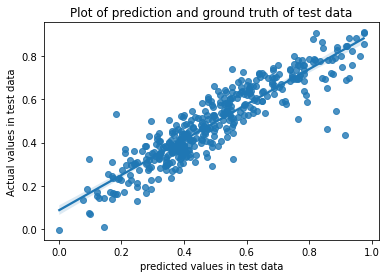

In [88]:
# Plotting a regplot between y_test and y_pred for lasso model
sns.regplot(y_test,y_pred_test_lasso)
plt.title("Plot of prediction and ground truth of test data")
plt.xlabel("predicted values in test data")
plt.ylabel("Actual values in test data")
plt.show()

Lets get coefficients of each feature.

In [89]:
# Create dataframe with the significant features and the their respective coefficeints
coefficients = pd.DataFrame({"features": col, "coefficients": np.round_(lasso.coef_,decimals =6)})
coefficients.sort_values(by = 'coefficients',ascending = False,inplace = True)
coefficients

,features,coefficients
5,GrLivArea,0.619604
3,OverallQual,0.381542
8,GarageCars,0.202804
2,LotArea,0.184071
28,ExterQual_Gd,0.126628
4,OverallCond,0.123633
6,BsmtFullBath,0.113417
16,Neighborhood_NridgHt,0.103948
18,Neighborhood_StoneBr,0.095087
27,ExterQual_Fa,0.088295


Lets get top 5 predictors of this model.

In [90]:
# Create dataframe with the significant features and the their respective coefficeints
coefficients = pd.DataFrame({"features": col, "coefficients": abs(lasso.coef_)})
coefficients.sort_values(by = 'coefficients',ascending = False,inplace = True)
coefficients.head(5)

,features,coefficients
5,GrLivArea,0.619604
3,OverallQual,0.381542
13,LotShape_IR3,0.230938
8,GarageCars,0.202804
2,LotArea,0.184071


## Choosing best model

In [91]:
# store metrics
metric_data = {'Model':["LR model","Ridge Model","Lasso Model"],
        'Adjusted_R2_train':[Adj_R2_train, Adj_R2_train_ridge, Adj_R2_train_lasso],
        'Adjusted_R2_test':[Adj_R2_test, Adj_R2_test_ridge, Adj_R2_test_lasso],
        'Mean square error' : [mse,mse_ridge,mse_lasso]}

# Create DataFrame
df = pd.DataFrame(metric_data)
df

,Model,Adjusted_R2_train,Adjusted_R2_test,Mean square error
0,LR model,0.835193,0.780388,0.007659
1,Ridge Model,0.831001,0.783088,0.007545
2,Lasso Model,0.831001,0.794504,0.007160


We see that the test score has increased and mean square error is decreasing from LR model to ridge and lasso models. Hence lasso model is selected. Added advantage of lasso is feature selection ie it has only 46 features while other two has 50 features each.

## Validating assumptions of LR

We will now validate LR assumptions for all 3 models created.


###Residual Analysis

We will validate assumption that the error(residuals) are normally distributed with mean zero.


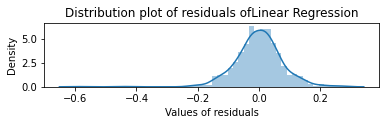

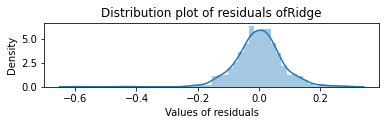

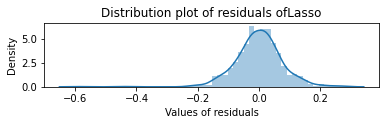

In [92]:
# calculate residuals
res = y_train - y_train_pred
res_ridge = y_train - y_pred_train_ridge
res_lasso = y_train - y_pred_train_lasso
res_list = [res,res_ridge,res_lasso]
model_name = ["Linear Regression","Ridge","Lasso"]
# plot residual distribution
for i,j in enumerate(res_list):
  plt.subplot(3,1,i+1)
  sns.distplot(res)
  plt.title("Distribution plot of residuals of" + model_name[i])
  plt.xlabel("Values of residuals")
  plt.ylabel("Density")
  plt.savefig("normal.jpeg")
  plt.show()

The distribution plot of residuals show a normal distribution and hence the assumption is validated.


###Homoscedasticity and independence

LR assumes that the error terms have constant variance and are independent. Lets check for the same for our model.


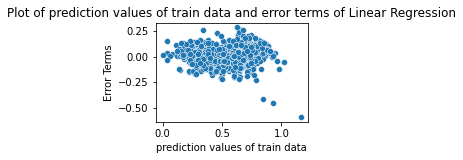

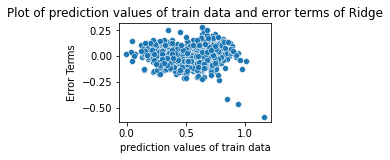

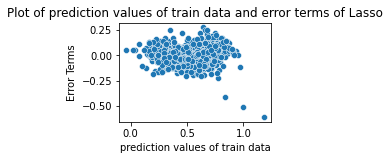

In [93]:
# Plot a scatter plot for residuals and y predicted values 
pred_list = [y_train_pred,y_pred_train_ridge,y_pred_train_lasso]
for i,j in enumerate(res_list):
  plt.subplot(2,2,i+1)
  sns.scatterplot(pred_list[i],res_list[i])

  plt.title("Plot of prediction values of train data and error terms of "+ model_name[i])
  plt.xlabel("prediction values of train data")
  plt.ylabel("Error Terms")
  plt.savefig("Homoscedacity.jpeg")
  plt.show()

We can see the error terms is not following any common patterns and is completely random in nature. Hence this assumption of LR is also validated.

#Best predictors and interpret results

Now lets see the significant features and their coefficients of our selected model.

In [94]:
# Create dataframe with the significant features and the their respective coefficeints
coefficients = pd.DataFrame({"features": col, "coefficients": abs(lasso.coef_)})
coefficients.sort_values(by = 'coefficients',ascending = False,inplace = True)
coefficients.head(10)

,features,coefficients
5,GrLivArea,0.619604
3,OverallQual,0.381542
13,LotShape_IR3,0.230938
8,GarageCars,0.202804
2,LotArea,0.184071
28,ExterQual_Gd,0.126628
4,OverallCond,0.123633
6,BsmtFullBath,0.113417
16,Neighborhood_NridgHt,0.103948
1,LotFrontage,0.103316




####Top 10 predictors are :
GrLivArea, 	OverallQual, 	LotShape_IR3,GarageCars, LotArea, ExterQual_Gd, OverallCond, BsmtFullBath,Neighborhood_NridgHt and LotFrontage. 

####Interpretation of coefficients

We see that there are both positive and negative features among top 10 features.

8 features namely GrLivArea, 	OverallQual,GarageCars, LotArea, ExterQual_Gd, OverallCond, BsmtFullBath  and Neighborhood_NridgHt	
 	  have positive coefficents. That means a unit increase in value of these features when other features are constant increases the SalePrice by value of coefficient of the corresponding feature.

2 features namely LotShape_IR3 and LotFrontage have negative coefficents. That means a unit increase in value of these features when other features are constant decreases the SalePrice by value of coefficient of the corresponding feature.

The most important feature are GrLivArea, 	OverallQual as they have coefficients more than 0.3. This is in consensus with how business understanding that higher the overall quality and higher the living area above ground , higher will be sale price of the house.






# Optimal values of lamda

####ridge regression : optimum lambda = 0.1
####lambda regression : optimum lambda = 0.0001


#Problem statement - 2

 What will be the changes in the model if you choose double the value of alpha for ridge ? 

In [95]:
# Building Ridge Model by doubling the value of alpha to 0.2
ridge_new = Ridge(alpha=0.2,random_state=100)
ridge_new.fit(X_train_reg,y_train)
ridge_new_coef = ridge_new.coef_
y_test_pred_ridge_2 = ridge_new.predict(X_test_reg)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred_ridge_2))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred_ridge_2))


The R2 Score of the model on the test dataset for doubled alpha is 0.8129146625900712
The MSE of the model on the test dataset for doubled alpha is 0.007448739865288366


We see that there is not much change in R2 score and MSE. This could be because the lambda value is small (0.1) and hence doubling didnt have have much effect.

What will be the most important predictor variables after the change is implemented?

In [96]:
ridge_new_coef

array([-0.10112423, -0.1198483 ,  0.22117929,  0.37611485,  0.12175309,
        0.60029264,  0.11479639,  0.07588173,  0.21353754,  0.11948652,
        0.12531036,  0.14186225,  0.09566905, -0.23451761,  0.0950788 ,
        0.09013016,  0.11191764,  0.06518649,  0.1074196 ,  0.08432403,
       -0.074187  ,  0.05361182, -0.02648898,  0.1066866 , -0.02648898,
       -0.06844036, -0.07226931,  0.15636283,  0.15565526,  0.1049459 ,
        0.06214054,  0.04292683, -0.04187476,  0.02347064, -0.0100451 ,
        0.00760064,  0.00680722, -0.01447761,  0.06390594, -0.01447761,
       -0.01447761, -0.01922829,  0.12529198,  0.07674429,  0.13218499,
        0.08430838,  0.04127418,  0.04127418,  0.04127418, -0.09748881])

In [97]:
# Create dataframe with the significant features and the their respective coefficeints
coefficients = pd.DataFrame({"features": col, "ridge coefficients with double value of alpha": abs(ridge_new_coef)})
coefficients.sort_values(by = 'ridge coefficients with double value of alpha',ascending = False,inplace = True)
print('The most important predictor variables are as follows:')
coefficients.head(10)


The most important predictor variables are as follows:


,features,ridge coefficients with double value of alpha
5,GrLivArea,0.600293
3,OverallQual,0.376115
13,LotShape_IR3,0.234518
2,LotArea,0.221179
8,GarageCars,0.213538
27,ExterQual_Fa,0.156363
28,ExterQual_Gd,0.155655
11,MSZoning_RL,0.141862
44,GarageType_BuiltIn,0.132185
10,MSZoning_RH,0.125310


 What will be the changes in the model if you choose double the value of alpha for lasso? 

In [98]:
# Building Lasso Model by doubling the value of alpha to 0.0002
lasso_new = Lasso(alpha=0.0002,random_state=100)
lasso_new.fit(X_train_reg,y_train)
lasso_new_coef = lasso_new.coef_
y_test_pred_lasso_2 = lasso_new.predict(X_test_reg)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred_lasso_2))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred_lasso_2))


The R2 Score of the model on the test dataset for doubled alpha is 0.8253445203103046
The MSE of the model on the test dataset for doubled alpha is 0.006953849255460967


We see that there is not much change in R2 score and MSE. This could be because the lambda value is small (0.1) and hence doubling didnt have have much effect.

What will be the most important predictor variables after the change is implemented?

In [99]:
# Create dataframe with the significant features and the their respective coefficeints
coefficients = pd.DataFrame({"features": col, "Lasso coefficients with double value of alpha": abs(lasso_new_coef)})
coefficients.sort_values(by = 'Lasso coefficients with double value of alpha',ascending = False,inplace = True)
print('The most important predictor variables are as follows:')
coefficients.head(10)


The most important predictor variables are as follows:


,features,Lasso coefficients with double value of alpha
5,GrLivArea,0.602335
3,OverallQual,0.379474
13,LotShape_IR3,0.208333
8,GarageCars,0.194200
2,LotArea,0.133809
4,OverallCond,0.120919
6,BsmtFullBath,0.110534
16,Neighborhood_NridgHt,0.093883
0,MSSubClass,0.089938
28,ExterQual_Gd,0.083570


After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [100]:
	
#Removing the 5 most important predictor variables from the incoming dataset
X_test_reg_new = X_test_reg.drop(["GrLivArea","OverallQual", "LotShape_IR3",	"GarageCars", 	"LotArea"] ,axis=1)
X_train_reg_new = X_train_reg.drop(["GrLivArea","OverallQual", "LotShape_IR3",	"GarageCars", 	"LotArea"] ,axis=1)
# update list of features
remov_list = ["GrLivArea","OverallQual", "LotShape_IR3",	"GarageCars", 	"LotArea"]
col = list(col)
col = [i for i in col if i not in remov_list ]
# Building Lasso Model with the new dataset
lasso_2 = Lasso(alpha=0.0001,random_state=100)
lasso_2.fit(X_train_reg_new,y_train)
lasso_2_coef = lasso_2.coef_
# predict on test data
y_test_pred = lasso_2.predict(X_test_reg_new)
# get R2 score and mse metrics
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))

# Create dataframe with the significant features and the their respective coefficeints
coefficients = pd.DataFrame({"features": col, "Lasso coefficients with double value of alpha": abs(np.round_(lasso_2_coef,decimals =6))})
coefficients.sort_values(by = 'Lasso coefficients with double value of alpha',ascending = False,inplace = True)
print('The most important predictor variables are as follows:')
coefficients.head(10)

The R2 Score of the model on the test dataset is 0.7326420523234372
The MSE of the model on the test dataset is 0.010644766878745281
The most important predictor variables are as follows:


,features,Lasso coefficients with double value of alpha
4,FullBath,0.338813
18,Exterior1st_Stone,0.213660
10,Neighborhood_NoRidge,0.165359
1,LotFrontage,0.164955
13,Neighborhood_StoneBr,0.141655
39,GarageType_BuiltIn,0.134395
9,Neighborhood_Crawfor,0.129006
2,OverallCond,0.125594
11,Neighborhood_NridgHt,0.118904
12,Neighborhood_Somerst,0.118640
